# Library

In [1]:
import polars as pl
import matplotlib.pyplot as plt

# Data

| STT | Tên Cột | Nhóm Dữ liệu | Mô tả Chi tiết |
| :-- | :--- | :--- | :--- |
| 1 | `id` | Định danh | Tên định danh duy nhất của tài sản (vd: bitcoin). |
| 2 | `symbol` | Định danh | Mã giao dịch viết tắt (vd: btc). |
| 3 | `hour_start` | Thời gian | Thời điểm bắt đầu của cây nến 1 giờ (UTC). |
| 4 | `hour_end` | Thời gian | Thời điểm kết thúc của cây nến 1 giờ (UTC). |
| 5 | `open` | Giá (OHLC) | Giá mở cửa - Giao dịch đầu tiên trong giờ. |
| 6 | `high` | Giá (OHLC) | Giá cao nhất đạt được trong giờ. |
| 7 | `low` | Giá (OHLC) | Giá thấp nhất chạm đến trong giờ. |
| 8 | `close` | Giá (OHLC) | Giá đóng cửa - Giao dịch cuối cùng trong giờ. |
| 9 | `total_volume_24h` | Khối lượng | Tổng giá trị giao dịch trong 24h gần nhất (USD). |
| 10 | `high_price_24h` | Thống kê 24h | Mức giá cao nhất ghi nhận trong 24h qua. |
| 11 | `low_price_24h` | Thống kê 24h | Mức giá thấp nhất ghi nhận trong 24h qua. |
| 12 | `price_change_24h` | Thống kê 24h | Thay đổi giá tuyệt đối so với 24h trước (USD). |
| 13 | `price_change_percentage_24h` | Thống kê 24h | Thay đổi giá tương đối so với 24h trước (%). |
| 14 | `market_cap` | Vốn hóa | Vốn hóa thị trường (Giá × Cung lưu thông). |
| 15 | `market_cap_rank` | Vốn hóa | Thứ hạng vốn hóa của tài sản. |
| 16 | `circulating_supply` | Nguồn cung | Số lượng coin đang lưu hành trên thị trường. |
| 17 | `total_supply` | Nguồn cung | Tổng số coin đã được tạo ra (bao gồm đã khóa). |
| 18 | `atl` | Lịch sử | All-Time Low: Giá thấp nhất lịch sử. |
| 19 | `ath` | Lịch sử | All-Time High: Giá cao nhất lịch sử. |
| 20 | `sentiment_votes_up_percentage` | Tâm lý | % người dùng bình chọn xu hướng Tăng (Bullish). |
| 21 | `sentiment_votes_down_percentage` | Tâm lý | % người dùng bình chọn xu hướng Giảm (Bearish). |
| 22 | `dist_ath` | Lịch sử | Khoảng cách giá hiện tại tới đỉnh lịch sử. |
| 23 | `dist_atl` | Lịch sử | Khoảng cách giá hiện tại tới đáy lịch sử. |
| 24 | `liquidity` | Thanh khoản | Điểm số đo lường độ sâu thanh khoản. |
| 25 | `supply_ratio` | Nguồn cung | Tỷ lệ cung (`circulating` / `total`). |
| 26 | `sentiment_score` | Tâm lý | Điểm số tổng hợp đánh giá cảm xúc thị trường. |

In [2]:
df = pl.read_parquet("../datasets/coins.parquet")
df.head()

id,symbol,hour_start,hour_end,open,high,low,close,total_volume_24h,high_price_24h,low_price_24h,price_change_24h,price_change_percentage_24h,market_cap,market_cap_rank,circulating_supply,total_supply,atl,ath,sentiment_votes_up_percentage,sentiment_votes_down_percentage,dist_ath,dist_atl,liquidity,supply_ratio,sentiment_score
str,str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""bitcoin""","""btc""",2025-11-14 04:00:00 UTC,2025-11-14 05:00:00 UTC,99097.0,99097.0,97137.0,97770.0,1.0536e11,103933.0,97117.0,-4303.574128,-4.21616,1.9449e12,1,1.9948537e7,1.9948537e7,67.81,126080.0,64.0,36.0,0.22454,1440.82274,0.054172,1.0,0.64
"""bitcoin""","""btc""",2025-11-15 22:00:00 UTC,2025-11-15 23:00:00 UTC,95233.0,95558.0,95233.0,95542.0,4.1049e10,96641.0,94138.0,614.42,0.64726,1.9048e12,1,1.9948812e7,1.9948812e7,67.81,126080.0,61.88,38.13,0.242211,1407.966229,0.02155,1.0,0.618738
"""ripple""","""xrp""",2025-11-21 03:00:00 UTC,2025-11-21 04:00:00 UTC,1.97,1.99,1.97,1.99,6.8929e9,2.14,1.97,-0.146301,-6.86109,1.1969e11,4,6.0257e10,9.9986e10,0.002686,3.65,75.39,24.61,0.454795,739.82071,0.057589,0.602655,0.7539
"""ripple""","""xrp""",2025-11-21 04:00:00 UTC,2025-11-21 05:00:00 UTC,1.98,1.98,1.96,1.98,7.6491e9,2.14,1.96,-0.158201,-7.39076,1.1889e11,4,6.0257e10,9.9986e10,0.002686,3.65,75.0,25.0,0.457534,736.097993,0.064335,0.602655,0.75
"""ripple""","""xrp""",2025-11-21 06:00:00 UTC,2025-11-21 07:00:00 UTC,1.98,1.98,1.96,1.97,7.1117e9,2.14,1.96,-0.161383,-7.5853,1.1847e11,4,6.0257e10,9.9986e10,0.002686,3.65,73.81,26.19,0.460274,732.375276,0.060031,0.602655,0.7381


In [3]:
df_bitcoin = df.filter(pl.col("id") == "bitcoin")
df_bitcoin.head()


id,symbol,hour_start,hour_end,open,high,low,close,total_volume_24h,high_price_24h,low_price_24h,price_change_24h,price_change_percentage_24h,market_cap,market_cap_rank,circulating_supply,total_supply,atl,ath,sentiment_votes_up_percentage,sentiment_votes_down_percentage,dist_ath,dist_atl,liquidity,supply_ratio,sentiment_score
str,str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""bitcoin""","""btc""",2025-11-14 04:00:00 UTC,2025-11-14 05:00:00 UTC,99097.0,99097.0,97137.0,97770.0,1.0536e11,103933.0,97117.0,-4303.574128,-4.21616,1.9449e12,1,1.9948537e7,1.9948537e7,67.81,126080.0,64.0,36.0,0.22454,1440.82274,0.054172,1.0,0.64
"""bitcoin""","""btc""",2025-11-15 22:00:00 UTC,2025-11-15 23:00:00 UTC,95233.0,95558.0,95233.0,95542.0,4.1049e10,96641.0,94138.0,614.42,0.64726,1.9048e12,1,1.9948812e7,1.9948812e7,67.81,126080.0,61.88,38.13,0.242211,1407.966229,0.02155,1.0,0.618738
"""bitcoin""","""btc""",2025-11-23 23:00:00 UTC,2025-11-24 00:00:00 UTC,88005.0,88005.0,86778.0,86786.0,6.0470e10,87995.0,84676.0,2103.71,2.48423,1.7312e12,1,1.9952637e7,1.9952637e7,67.81,126080.0,72.3,27.7,0.311659,1278.840731,0.034929,1.0,0.723
"""bitcoin""","""btc""",2025-11-27 06:00:00 UTC,2025-11-27 07:00:00 UTC,91012.0,91365.0,90981.0,91249.0,7.5610e10,91850.0,86448.0,3453.99,3.93415,1.8198e12,1,1.9954181e7,1.9954209e7,67.81,126080.0,80.77,19.23,0.276261,1344.656983,0.041548,0.999999,0.8077
"""bitcoin""","""btc""",2025-11-28 03:00:00 UTC,2025-11-28 04:00:00 UTC,90990.0,91269.0,90990.0,91189.0,5.2966e10,91827.0,90486.0,24.5,0.02687,1.8198e12,1,1.9954684e7,1.9954684e7,67.81,126080.0,80.34,19.66,0.276737,1343.772157,0.029106,1.0,0.8034


In [4]:
# 1. Kiểm tra giá trị Null
# Xem cột nào bị thiếu dữ liệu
null_stats = df_bitcoin.null_count()
print("Thống kê Null:\n", null_stats)

# 2. Kiểm tra Duplicate (Trùng lặp thời gian)
# Một giờ không được xuất hiện 2 lần
duplicate_check = df_bitcoin.filter(pl.col("hour_start").is_duplicated())
print(f"Số lượng dòng bị trùng thời gian: {duplicate_check.height}")

# 3. Kiểm tra tính liên tục của thời gian (Time Continuity)
# Dữ liệu 1 giờ (1H) thì chênh lệch giữa các dòng phải đúng bằng 1 giờ
time_gaps = df_bitcoin.sort("hour_start").with_columns(
    time_diff = pl.col("hour_start").diff()
).filter(
    (pl.col("time_diff") != pl.duration(hours=1)) & (pl.col("time_diff").is_not_null())
)

print(f"Số lượng khoảng thời gian bị đứt quãng (Gap): {time_gaps.height}")
if time_gaps.height > 0:
    print(time_gaps.select(["hour_start", "time_diff"]).head())

Thống kê Null:
 shape: (1, 26)
┌─────┬────────┬────────────┬──────────┬───┬──────────┬───────────┬──────────────┬─────────────────┐
│ id  ┆ symbol ┆ hour_start ┆ hour_end ┆ … ┆ dist_atl ┆ liquidity ┆ supply_ratio ┆ sentiment_score │
│ --- ┆ ---    ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---       ┆ ---          ┆ ---             │
│ u32 ┆ u32    ┆ u32        ┆ u32      ┆   ┆ u32      ┆ u32       ┆ u32          ┆ u32             │
╞═════╪════════╪════════════╪══════════╪═══╪══════════╪═══════════╪══════════════╪═════════════════╡
│ 0   ┆ 0      ┆ 0          ┆ 0        ┆ … ┆ 0        ┆ 0         ┆ 0            ┆ 0               │
└─────┴────────┴────────────┴──────────┴───┴──────────┴───────────┴──────────────┴─────────────────┘
Số lượng dòng bị trùng thời gian: 0
Số lượng khoảng thời gian bị đứt quãng (Gap): 1
shape: (1, 2)
┌─────────────────────────┬──────────────┐
│ hour_start              ┆ time_diff    │
│ ---                     ┆ ---          │
│ datetime[μs, UTC]       ┆ duratio

In [5]:
# Sử dụng describe() của Polars nhưng chọn lọc các cột quan trọng
desc_stats = df_bitcoin.select([
    "close", "total_volume_24h", "sentiment_score", "price_change_percentage_24h"
]).describe()

print(desc_stats)

# Tính độ biến động nội tại trong nến (Intra-candle Volatility)
# High - Low càng lớn nghĩa là giờ đó thị trường càng hỗn loạn
df_volatility = df_bitcoin.with_columns(
    volatility_pct = (pl.col("high") - pl.col("low")) / pl.col("open") * 100
)

# Xem top 5 giờ biến động mạnh nhất
print("Top 5 giờ biến động mạnh nhất:")
print(df_volatility.sort("volatility_pct", descending=True).select(["hour_start", "volatility_pct", "sentiment_score"]).head(5))

shape: (9, 5)
┌────────────┬──────────────┬──────────────────┬─────────────────┬─────────────────────────────┐
│ statistic  ┆ close        ┆ total_volume_24h ┆ sentiment_score ┆ price_change_percentage_24h │
│ ---        ┆ ---          ┆ ---              ┆ ---             ┆ ---                         │
│ str        ┆ f64          ┆ f64              ┆ f64             ┆ f64                         │
╞════════════╪══════════════╪══════════════════╪═════════════════╪═════════════════════════════╡
│ count      ┆ 716.0        ┆ 716.0            ┆ 716.0           ┆ 716.0                       │
│ null_count ┆ 0.0          ┆ 0.0              ┆ 0.0             ┆ 0.0                         │
│ mean       ┆ 92904.814246 ┆ 7.1117e10        ┆ 0.693001        ┆ -0.378119                   │
│ std        ┆ 6073.857352  ┆ 2.4241e10        ┆ 0.087973        ┆ 2.858481                    │
│ min        ┆ 82226.0      ┆ 2.1420e10        ┆ 0.5077          ┆ -10.45839                   │
│ 25%        ┆ 8

In [ ]:
# Chọn các đặc trưng số quan trọng để xem tương quan
cols_to_corr = [
    "close",
    "total_volume_24h",
    "sentiment_score",
    "sentiment_votes_up_percentage",
    "price_change_percentage_24h",
    "liquidity"
]

# Tính ma trận tương quan (Pearson Correlation)
correlation_matrix = df_bitcoin.select([
    pl.col(c) for c in cols_to_corr
]).corr()

# Để dễ nhìn, ta có thể hiển thị tương quan giữa Price Change và Sentiment
print("Tương quan giữa Biến động giá 24h và Điểm Sentiment:")
print(correlation_matrix) 
# Mẹo: nên nhìn vào giao điểm giữa dòng 'price_change...' và cột 'sentiment_score'

Tương quan giữa Biến động giá 24h và Điểm Sentiment:
shape: (6, 6)
┌───────────┬──────────────────┬─────────────────┬──────────────────┬──────────────────┬───────────┐
│ close     ┆ total_volume_24h ┆ sentiment_score ┆ sentiment_votes_ ┆ price_change_per ┆ liquidity │
│ ---       ┆ ---              ┆ ---             ┆ up_percentage    ┆ centage_24h      ┆ ---       │
│ f64       ┆ f64              ┆ f64             ┆ ---              ┆ ---              ┆ f64       │
│           ┆                  ┆                 ┆ f64              ┆ f64              ┆           │
╞═══════════╪══════════════════╪═════════════════╪══════════════════╪══════════════════╪═══════════╡
│ 1.0       ┆ -0.049687        ┆ 0.308219        ┆ 0.308222         ┆ 0.144169         ┆ -0.225798 │
│ -0.049687 ┆ 1.0              ┆ -0.470326       ┆ -0.470327        ┆ -0.303143        ┆ 0.982476  │
│ 0.308219  ┆ -0.470326        ┆ 1.0             ┆ 1.0              ┆ 0.527504         ┆ -0.516896 │
│ 0.308222  ┆ -0.470327 

In [7]:
# 1. Sắp xếp dữ liệu theo thời gian (BẮT BUỘC)
df_bitcoin = df_bitcoin.sort("hour_start")

# 2. Sau đó mới chạy lại logic group_by_dynamic
df_daily = df_bitcoin.group_by_dynamic("hour_start", every="1d").agg([
    pl.col("close").last().alias("daily_close"),       # Giá đóng cửa cuối ngày
    pl.col("total_volume_24h").mean().alias("avg_vol"), # Volume trung bình
    pl.col("sentiment_score").mean().alias("avg_sent"), # Sentiment trung bình
    pl.col("high").max().alias("daily_high"),          # Giá cao nhất ngày
    pl.col("low").min().alias("daily_low")             # Giá thấp nhất ngày
])

print("Dữ liệu sau khi gộp theo ngày:")
print(df_daily.head())

Dữ liệu sau khi gộp theo ngày:
shape: (5, 6)
┌─────────────────────────┬─────────────┬───────────┬──────────┬────────────┬───────────┐
│ hour_start              ┆ daily_close ┆ avg_vol   ┆ avg_sent ┆ daily_high ┆ daily_low │
│ ---                     ┆ ---         ┆ ---       ┆ ---      ┆ ---        ┆ ---       │
│ datetime[μs, UTC]       ┆ f64         ┆ f64       ┆ f64      ┆ f64        ┆ f64       │
╞═════════════════════════╪═════════════╪═══════════╪══════════╪════════════╪═══════════╡
│ 2025-11-08 00:00:00 UTC ┆ 102278.0    ┆ 7.2400e10 ┆ 0.718452 ┆ 102729.0   ┆ 101502.0  │
│ 2025-11-09 00:00:00 UTC ┆ 104707.0    ┆ 5.0911e10 ┆ 0.717551 ┆ 105250.0   ┆ 101495.0  │
│ 2025-11-10 00:00:00 UTC ┆ 105979.0    ┆ 6.9987e10 ┆ 0.799417 ┆ 106552.0   ┆ 104380.0  │
│ 2025-11-11 00:00:00 UTC ┆ 103011.0    ┆ 7.0353e10 ┆ 0.797221 ┆ 107355.0   ┆ 102453.0  │
│ 2025-11-12 00:00:00 UTC ┆ 101617.0    ┆ 6.2276e10 ┆ 0.71685  ┆ 105278.0   ┆ 100945.0  │
└─────────────────────────┴─────────────┴───────────┴──

In [8]:
# 1. Xử lý Gap thời gian (Upsample + Interpolate)
# Tạo một dải thời gian đầy đủ từng giờ
df_clean = df_bitcoin.upsample(time_column="hour_start", every="1h").interpolate()

print(f"Số dòng sau khi lấp gap: {df_clean.height} (Cũ: {df_bitcoin.height})")

# 2. Loại bỏ các cột dư thừa (Feature Selection)
# Bỏ 'liquidity' (do trùng volume) và 'sentiment_votes_up/down' (do trùng score)
# Bỏ các cột ID không dùng cho train
cols_to_drop = [
    "id", "symbol", 
    "liquidity", 
    "sentiment_votes_up_percentage", 
    "sentiment_votes_down_percentage",
    "market_cap_rank" # Rank ít biến động, không tác động nhiều
]

df_final = df_clean.drop(cols_to_drop)

# 3. Tạo Target (Mục tiêu dự đoán)
# Giả sử bài toán là: Dự đoán giá ĐÓNG CỬA (Close) của 1 giờ sau (Next Hour Price)
df_final = df_final.with_columns(
    pl.col("close").shift(-1).alias("target_next_close")
).drop_nulls() # Bỏ dòng cuối cùng vì không có target

print("Dữ liệu đã sẵn sàng cho mô hình:")
print(df_final.head(3))

Số dòng sau khi lấp gap: 717 (Cũ: 716)
Dữ liệu đã sẵn sàng cho mô hình:
shape: (3, 21)
┌────────────┬───────────┬──────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ hour_start ┆ hour_end  ┆ open     ┆ high     ┆ … ┆ dist_atl  ┆ supply_ra ┆ sentiment ┆ target_ne │
│ ---        ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---       ┆ tio       ┆ _score    ┆ xt_close  │
│ datetime[μ ┆ datetime[ ┆ f64      ┆ f64      ┆   ┆ f64       ┆ ---       ┆ ---       ┆ ---       │
│ s, UTC]    ┆ μs, UTC]  ┆          ┆          ┆   ┆           ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪═══════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2025-11-08 ┆ 2025-11-0 ┆ 102664.0 ┆ 102664.0 ┆ … ┆ 1512.1101 ┆ 1.0       ┆ 0.6855    ┆ 102500.0  │
│ 03:00:00   ┆ 8         ┆          ┆          ┆   ┆ 61        ┆           ┆           ┆           │
│ UTC        ┆ 04:00:00  ┆          ┆          ┆   ┆           ┆           ┆           ┆           │
│   

In [9]:
import polars as pl

# 1. Tạo các đặc trưng độ trễ (Lag Features)
# Ta muốn mô hình học được: "Nếu hôm qua giá giảm và Sentiment giờ trước thấp -> Giờ sau giá sẽ giảm"
df_features = df_final.with_columns([
    # Lag của Giá Close (Quá khứ gần và xa)
    pl.col("close").shift(1).alias("lag_close_1h"),
    pl.col("close").shift(2).alias("lag_close_2h"),
    pl.col("close").shift(24).alias("lag_close_24h"),
    
    # Lag của Sentiment (Tâm lý đi trước giá)
    pl.col("sentiment_score").shift(1).alias("lag_sentiment_1h"),
    
    # Lag của Volume
    pl.col("total_volume_24h").shift(1).alias("lag_volume_1h"),
    
    # Rolling Features (Trung bình trượt) - Xu hướng ngắn hạn (SMA 7)
    pl.col("close").rolling_mean(window_size=7).alias("rolling_mean_7h")
]).drop_nulls() # Loại bỏ các dòng đầu tiên bị null do shift

print("Số lượng features sau khi tạo lag:", df_features.width)
print(df_features.head(3))

Số lượng features sau khi tạo lag: 27
shape: (3, 27)
┌────────────┬───────────┬──────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ hour_start ┆ hour_end  ┆ open     ┆ high     ┆ … ┆ lag_close ┆ lag_senti ┆ lag_volum ┆ rolling_m │
│ ---        ┆ ---       ┆ ---      ┆ ---      ┆   ┆ _24h      ┆ ment_1h   ┆ e_1h      ┆ ean_7h    │
│ datetime[μ ┆ datetime[ ┆ f64      ┆ f64      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ s, UTC]    ┆ μs, UTC]  ┆          ┆          ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪═══════════╪══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2025-11-09 ┆ 2025-11-0 ┆ 101648.0 ┆ 101733.0 ┆ … ┆ 102604.0  ┆ 0.7214    ┆ 4.9394e10 ┆ 101999.0  │
│ 03:00:00   ┆ 9         ┆          ┆          ┆   ┆           ┆           ┆           ┆           │
│ UTC        ┆ 04:00:00  ┆          ┆          ┆   ┆           ┆           ┆           ┆           │
│            ┆ UTC       ┆          ┆ 

In [10]:
# Chuyển đổi sang Pandas hoặc Numpy để đưa vào Scikit-learn/XGBoost
# (Polars xử lý dữ liệu, nhưng Model thường nhận input dạng array/pandas)
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Chuyển sang Pandas
pdf = df_features.to_pandas()

# Xác định danh sách các cột dùng để dự đoán (Features) và cột mục tiêu (Target)
target_col = "target_next_close"
# Loại bỏ các cột không dùng để train (như thời gian, cột target)
feature_cols = [c for c in pdf.columns if c not in ["hour_start", "hour_end", "target_next_close"]]

# Chia theo thời gian (Cắt đuôi làm Test)
split_idx = int(len(pdf) * 0.8)

X_train = pdf.iloc[:split_idx][feature_cols]
y_train = pdf.iloc[:split_idx][target_col]

X_test = pdf.iloc[split_idx:][feature_cols]
y_test = pdf.iloc[split_idx:][target_col]
test_dates = pdf.iloc[split_idx:]["hour_start"] # Giữ lại ngày để vẽ biểu đồ

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

Kích thước tập Train: (553, 24)
Kích thước tập Test: (139, 24)


[0]	validation_0-rmse:6422.28666	validation_1-rmse:2729.65839
[100]	validation_0-rmse:2450.18953	validation_1-rmse:1174.29617
[200]	validation_0-rmse:990.09425	validation_1-rmse:711.74879
[256]	validation_0-rmse:634.54968	validation_1-rmse:781.54590

===== KẾT QUẢ ĐÁNH GIÁ =====
Mean Absolute Error (MAE): $615.79


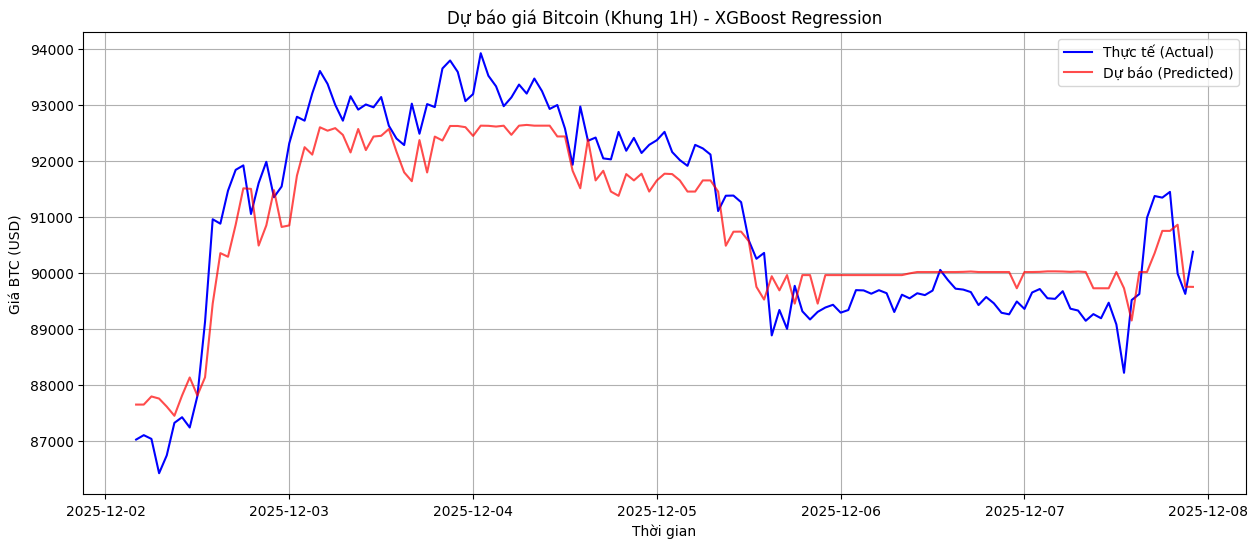

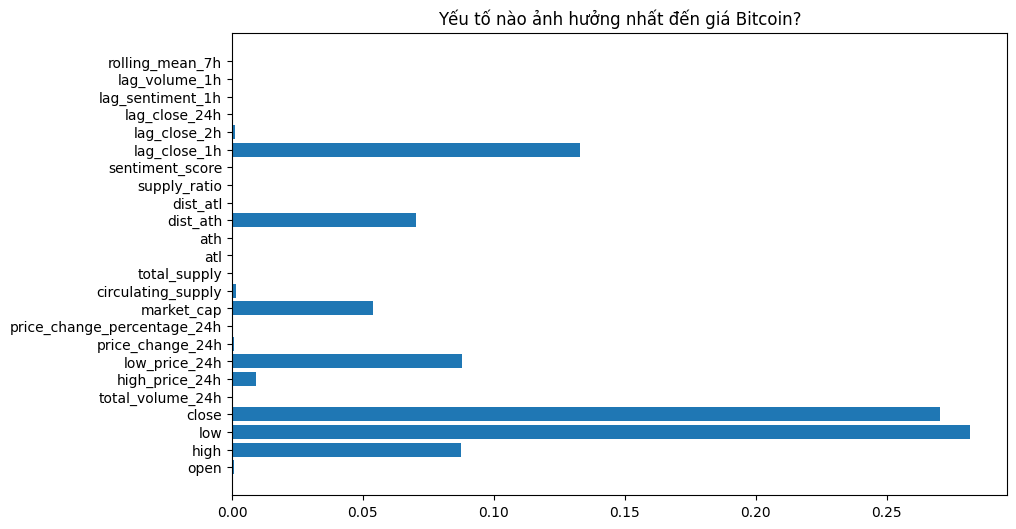

In [ ]:
# 1. Khởi tạo model (Đưa early_stopping_rounds vào đây)
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    objective='reg:squarederror',
    random_state=42,
    early_stopping_rounds=50  
)

# 2. Huấn luyện 
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)

# Dự báo
predictions = model.predict(X_test)

# Đánh giá sai số
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\n===== KẾT QUẢ ĐÁNH GIÁ =====")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
# MAE cho biết trung bình bạn đoán sai bao nhiêu USD.
# Ví dụ: Nếu giá là 90,000$ mà MAE là 500$, nghĩa là sai số chỉ khoảng 0.5% -> Rất tốt.

# Vẽ biểu đồ so sánh Thực tế vs Dự báo
plt.figure(figsize=(15, 6))
plt.plot(test_dates, y_test, label='Thực tế (Actual)', color='blue')
plt.plot(test_dates, predictions, label='Dự báo (Predicted)', color='red', alpha=0.7)
plt.title('Dự báo giá Bitcoin (Khung 1H) - XGBoost Regression')
plt.xlabel('Thời gian')
plt.ylabel('Giá BTC (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Xem Feature Importance (Cột nào quan trọng nhất?)
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, model.feature_importances_)
plt.title("Yếu tố nào ảnh hưởng nhất đến giá Bitcoin?")
plt.show()

===== KẾT QUẢ BACKTEST =====
Vốn ban đầu: $10,000
Vốn kết thúc: $10,885
Lợi nhuận: 8.85% (Trong giai đoạn Test)


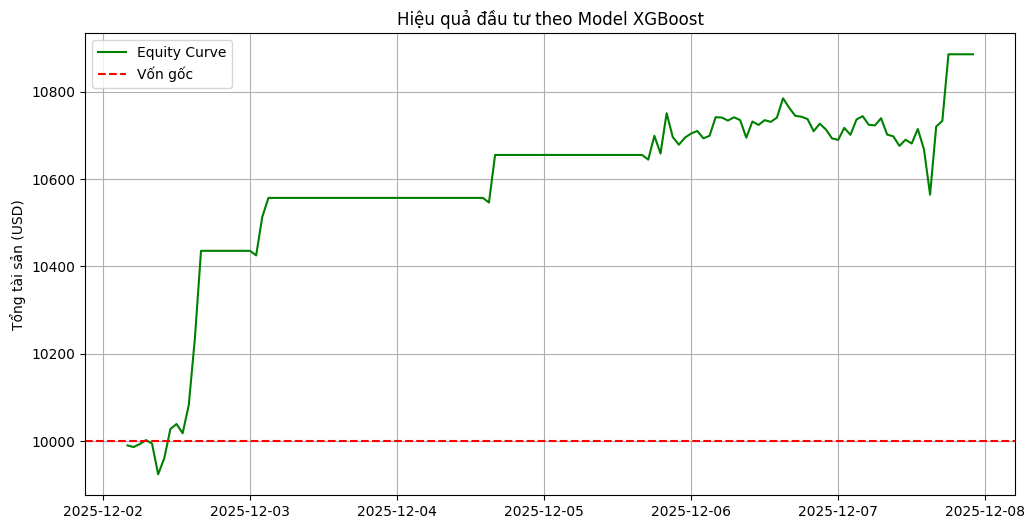

In [14]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu Backtest (Lấy từ tập Test)
# Chúng ta cần: Giá thực tế giờ này, Giá thực tế giờ sau, và Giá dự báo
df_backtest = pd.DataFrame({
    "current_price": X_test["lag_close_1h"], # Giá đóng cửa giờ trước (chính là giá mở vị thế)
    "actual_next_price": y_test,             # Giá thực tế (Target)
    "predicted_next_price": predictions,      # Giá model dự báo
    "date": test_dates
}).reset_index(drop=True)

# 2. Giả lập giao dịch
initial_capital = 10000 # Vốn ban đầu: 10,000 USD
capital = initial_capital
position = 0 # 0: Không có lệnh, 1: Long, -1: Short (nếu đánh phái sinh)
equity_curve = []

# Phí giao dịch (0.1% mỗi lệnh)
fee_rate = 0.001 

for i in range(len(df_backtest)):
    row = df_backtest.iloc[i]
    current_p = row["current_price"]
    pred_p = row["predicted_next_price"]
    actual_p = row["actual_next_price"]
    
    # Logic vào lệnh: Chỉ vào nếu Lợi nhuận dự kiến > Phí
    expected_change_pct = (pred_p - current_p) / current_p
    
    # --- CHIẾN THUẬT LONG ONLY (Chỉ Mua thấp Bán cao) ---
    if position == 0:
        if expected_change_pct > fee_rate: # Dự báo tăng đủ mạnh để bù phí
            # MUA
            btc_amount = capital / current_p * (1 - fee_rate)
            position = 1
            entry_price = current_p
    
    elif position == 1:
        if expected_change_pct < -fee_rate: # Dự báo giảm
            # BÁN CHỐT LỜI/CẮT LỖ
            capital = btc_amount * current_p * (1 - fee_rate)
            position = 0
            btc_amount = 0
            
    # Ghi nhận tài sản hiện tại (Mark to Market)
    current_equity = capital if position == 0 else (btc_amount * current_p)
    equity_curve.append(current_equity)

# 3. Kết quả
final_equity = equity_curve[-1]
profit_pct = ((final_equity - initial_capital) / initial_capital) * 100

print(f"===== KẾT QUẢ BACKTEST =====")
print(f"Vốn ban đầu: ${initial_capital:,.0f}")
print(f"Vốn kết thúc: ${final_equity:,.0f}")
print(f"Lợi nhuận: {profit_pct:.2f}% (Trong giai đoạn Test)")

# 4. Vẽ biểu đồ tăng trưởng tài sản
plt.figure(figsize=(12, 6))
plt.plot(df_backtest["date"], equity_curve, label="Equity Curve", color="green")
plt.axhline(y=initial_capital, color='r', linestyle='--', label="Vốn gốc")
plt.title("Hiệu quả đầu tư theo Model XGBoost")
plt.ylabel("Tổng tài sản (USD)")
plt.legend()
plt.grid(True)
plt.show()